In [26]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from pyod.models.mcd import MCD
from sklearn.neighbors import LocalOutlierFactor as LOF
from data_preparation import get_data, get_data1

In [78]:
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')
case = pd.read_csv(path + '/case.csv')
case

/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,description,equipment_id,facility_id,root_facility_id
0,0,Неправильно собранное оборудование (печь) посл...,5e03a7a7832a17ee33585ecf,5e03a79d832a17ee33585e8a,5e03a79d832a17ee33585e88
1,1,Поломка обогрева вентиляции 04.10.2021. Ранние...,60d31a0fe7c20e0e57f9c6df,60d31a01e7c20e0e57f9c696,60d31a01e7c20e0e57f9c696
2,2,Поломка вентиляции 25.11.2021 ~19:00. Сгорел Т...,5f33e3cbfb3bbc2c40fb6b1f,5f33e3c1fb3bbc2c40fb6ae6,5f33e3c1fb3bbc2c40fb6ae6
3,3,"Ошибка работы вентиляции 24.11.2021, 25.11.202...",612ca617bdd0fcc66ed23647,612ca605bdd0fcc66ed235e8,612ca605bdd0fcc66ed235e8
4,4,Cгорел мотор вентиляции 28.08.2021. Сильная ви...,5fe8db7efec0573c471e0685,5fe8db72fec0573c471e0632,5fe8db72fec0573c471e0632
5,5,Вентиляция НЕ включилась (выбило автомат) 09.0...,5f33e3cbfb3bbc2c40fb6b1f,5f33e3c1fb3bbc2c40fb6ae6,5f33e3c1fb3bbc2c40fb6ae6


# ANOM 1

In [3]:
anom = elec[elec.io_id == '5e03a7a2832a17ee33585ea4'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 532778

before = 3
after = 3

**OCSVM**\
Original data\
One dimension\
Without EMD

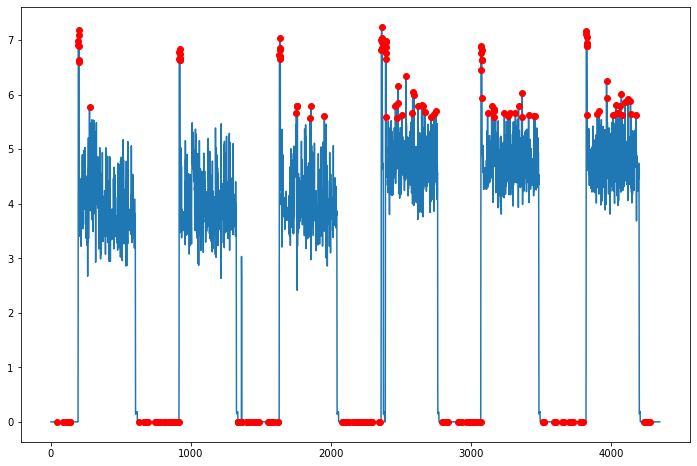

In [4]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

**OCSVM**\
Original data\
One dimension\
Without EMD\
FIT NORM

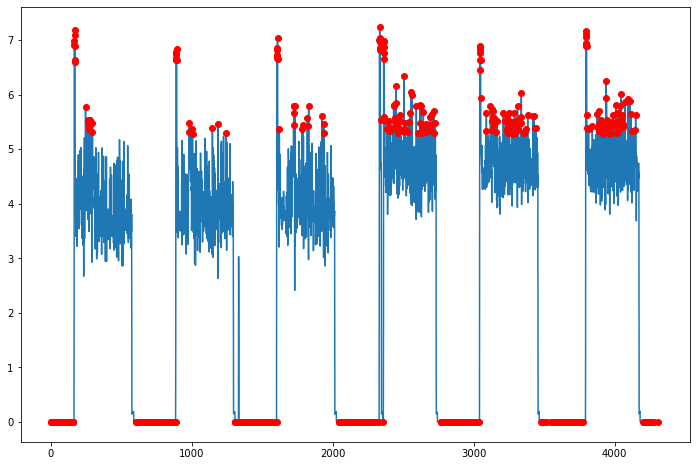

In [5]:
df = get_data(anom.loc[ind - 720 *before + 720:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

In [86]:
get_data(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')#[1:, np.newaxis]

array([[[7.74999996e-03, 2.30000000e+01, 2.00000000e+01, 5.00000000e+00,
         1.10000000e+01],
        [7.91666668e-03, 2.30000000e+01, 2.00000000e+01, 5.00000000e+00,
         1.10000000e+01],
        [7.58333335e-03, 0.00000000e+00, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        ...,
        [7.75000002e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        [7.75000002e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        [7.83333332e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01]],

       [[7.75000002e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        [7.75000002e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        [7.83333332e-03, 2.30000000e+01, 2.10000000e+01, 6.00000000e+00,
         1.10000000e+01],
        ...,
        [7.91666668e-03, 2.30000000e+01, 2.20000000e+01, 0.00000000e+00,
        

**OCSVM**\
Original data\
One dimension\
With EMD\
FIT NORM

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


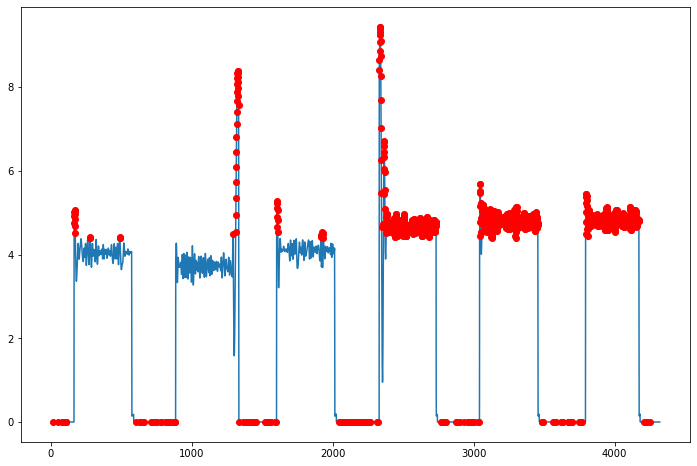

In [6]:
'''3 normal days'''
df = get_data1(anom.loc[ind - 720 *before :ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data1(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


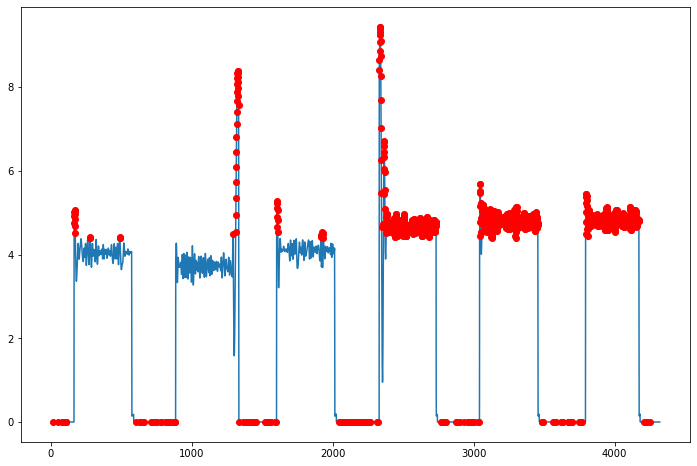

In [7]:
'''2 normal days'''
df = get_data1(anom.loc[ind - 720 *before :ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data1(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**IF**\
Original data\
One dimension\
With EMD\
FIT NORM

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


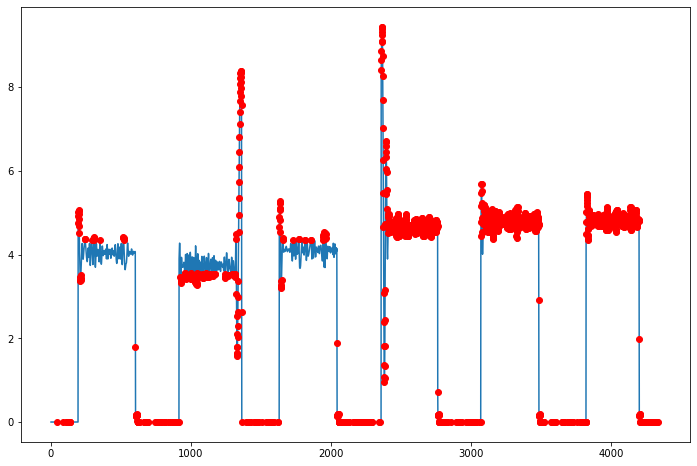

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**IF**\
Original data\
Multi dimension\
With EMD\
FIT NORM

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


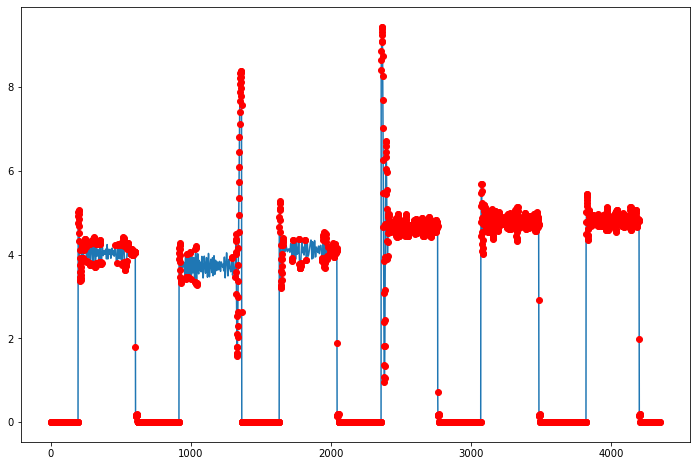

In [15]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**IF**\
Window data\
One dimension\
Without EMD\
FIT NORM

(3, 720)


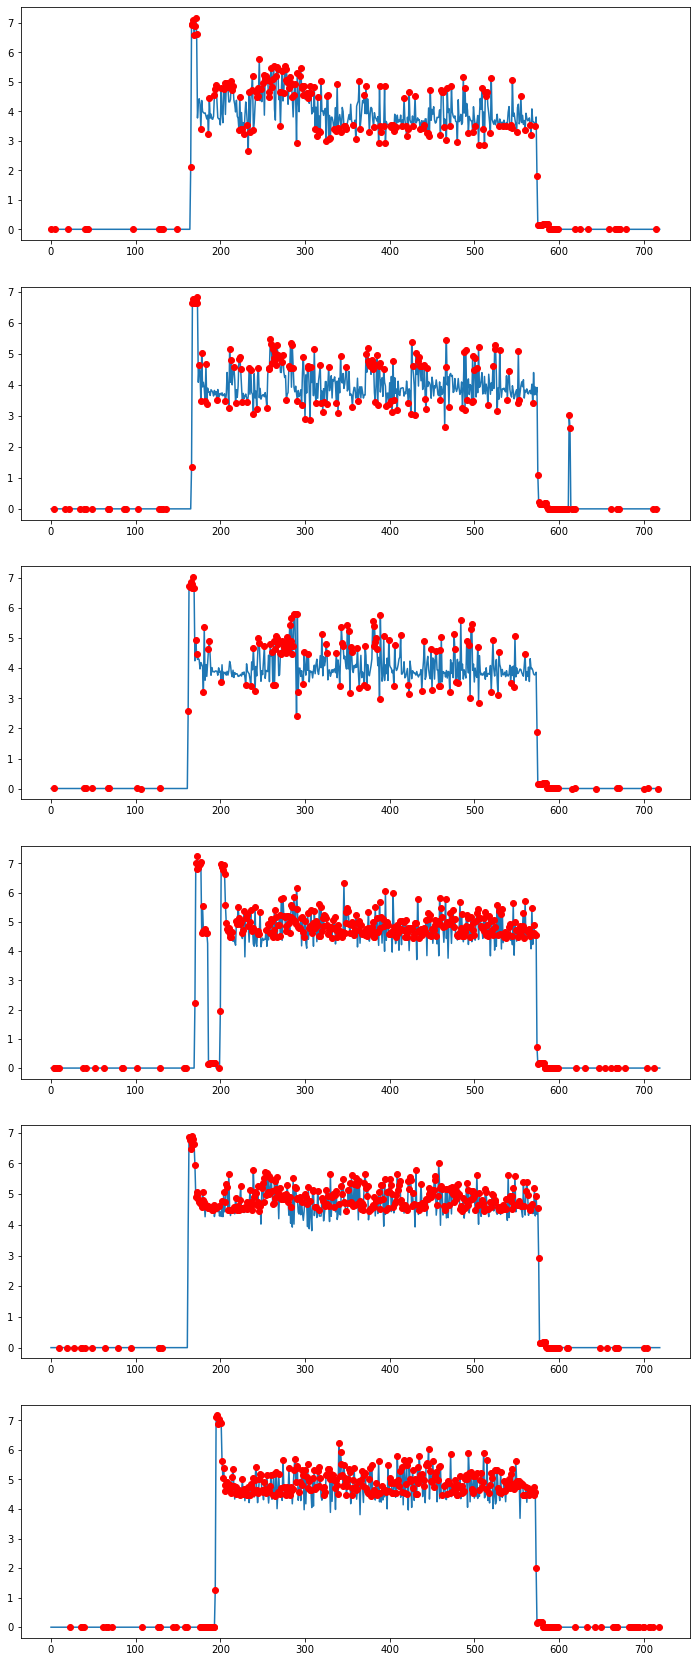

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

**MCD**\
Original data\
One dimension\
Without EMD\
FIT NORM

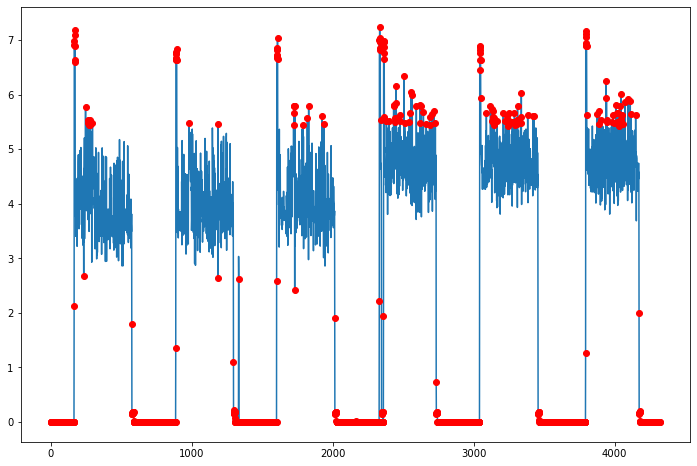

In [19]:
df = get_data(anom.loc[ind - 720 *before + 720:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
outliers_fraction = 0.45
random_state = np.random.RandomState(42)
model = MCD(contamination=outliers_fraction, random_state=random_state)
model.fit(df)


df = get_data(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == 1)[0], df[np.where(preds == 1)[0], 0], color='red', zorder=1)

# ANOM 2

In [21]:
anom = elec[elec.io_id == '60d31a0ae7c20e0e57f9c6b8'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 71905
before = 1
after = 4

**OCSVM**\
Original data\
One dimension\
With EMD

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


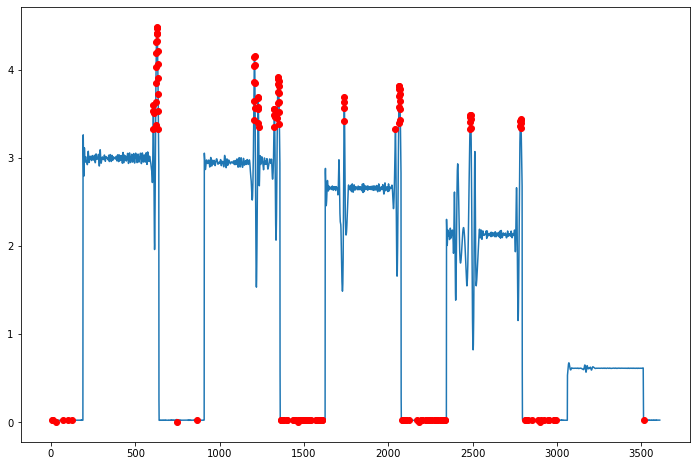

In [22]:
df = get_data(anom.loc[71905 - 730 * 1:71905 + 720 * 4].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df, zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)

**IF**\
Original data\
One dimension\
With EMD\
FIT NORM

/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


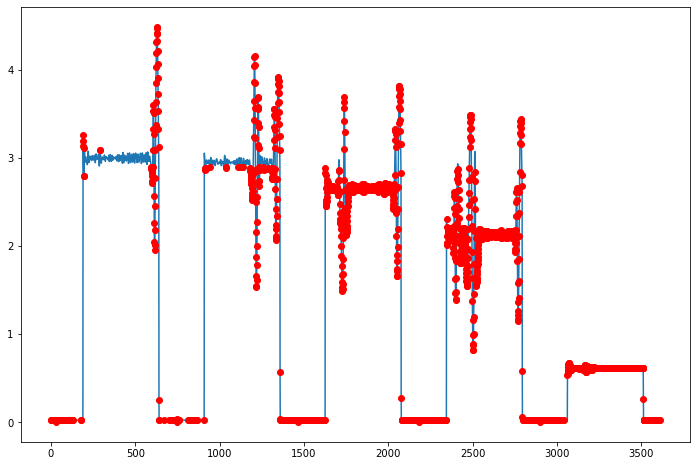

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**LOF**\
Original data\
One dimension\
Without EMD\

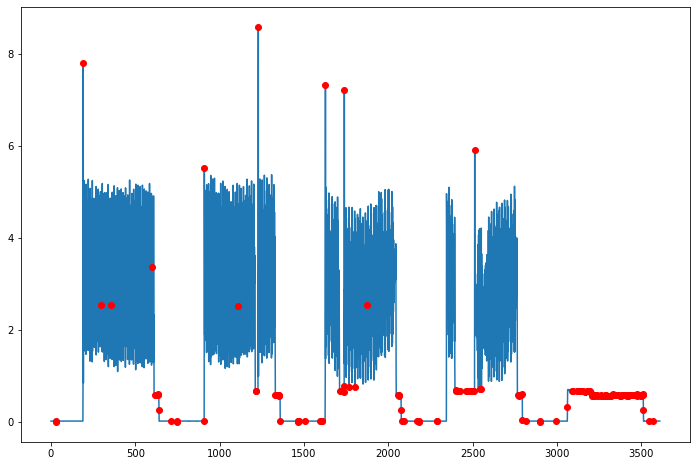

In [34]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=12) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df, zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)

**LOF**\
Original data\
Multi dimension\
Without EMD\

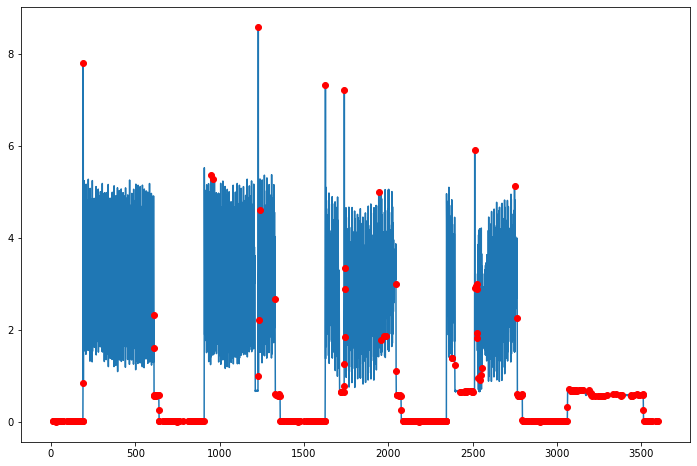

In [35]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=5) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**LOF**\
Windows data\
One dimension\
Without EMD\

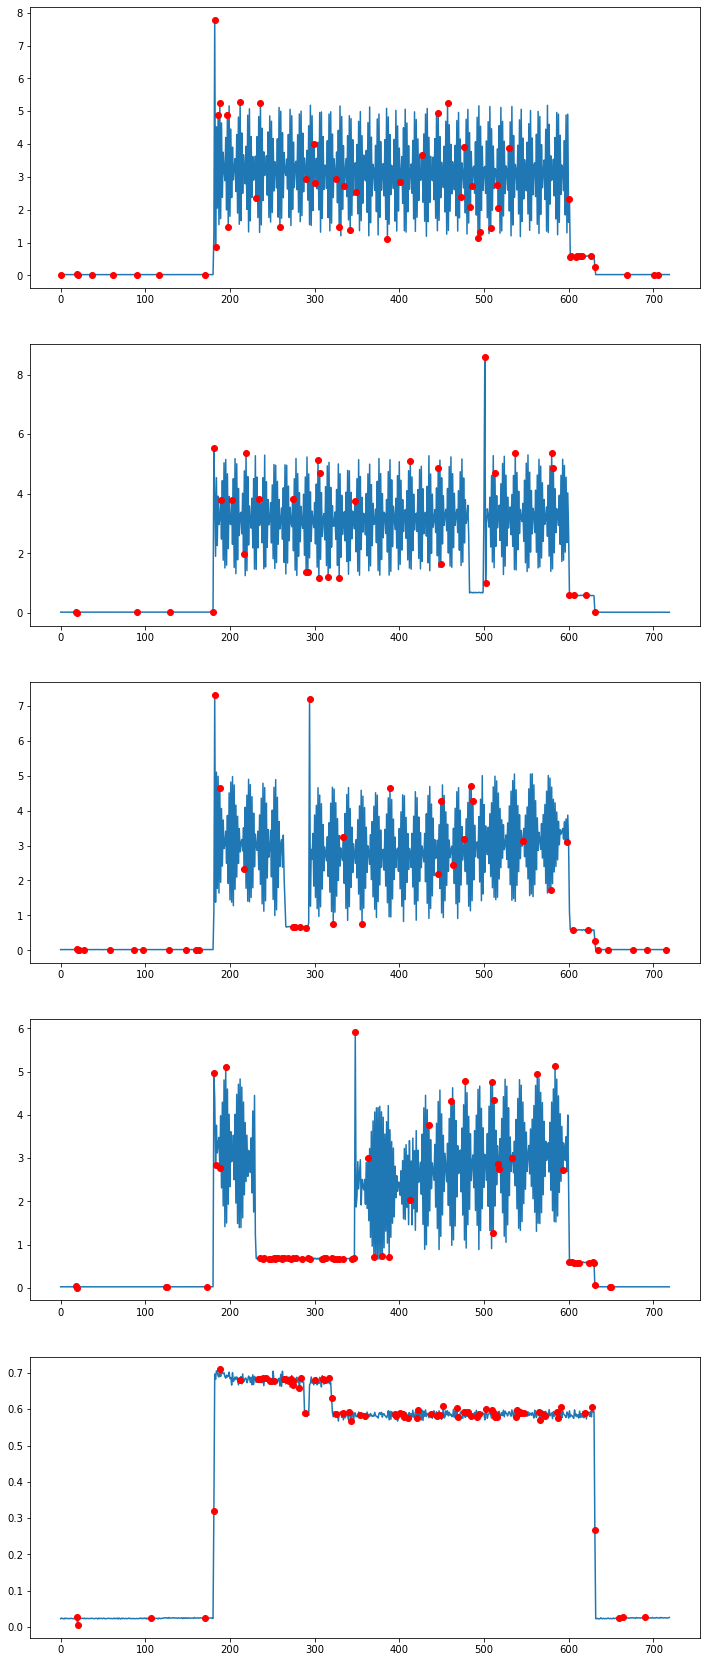

In [37]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=5)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

# ANOM 3

In [81]:
from data_preparation import get_data_3

In [82]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 335773
before = 4
after = 7

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10


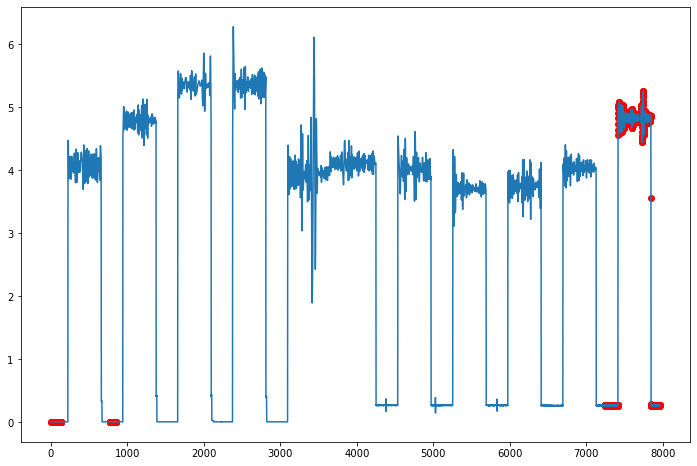

In [84]:
df = get_data_3(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='linear', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data_3(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], )
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

# ANOM 4

In [73]:
anom = elec[elec.io_id == '612ca610bdd0fcc66ed23613'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 39402
before = 2
after = 4

**IF**\
Windows data\
One dimension\
Without EMD\
TRAIN NORM


(1, 720)


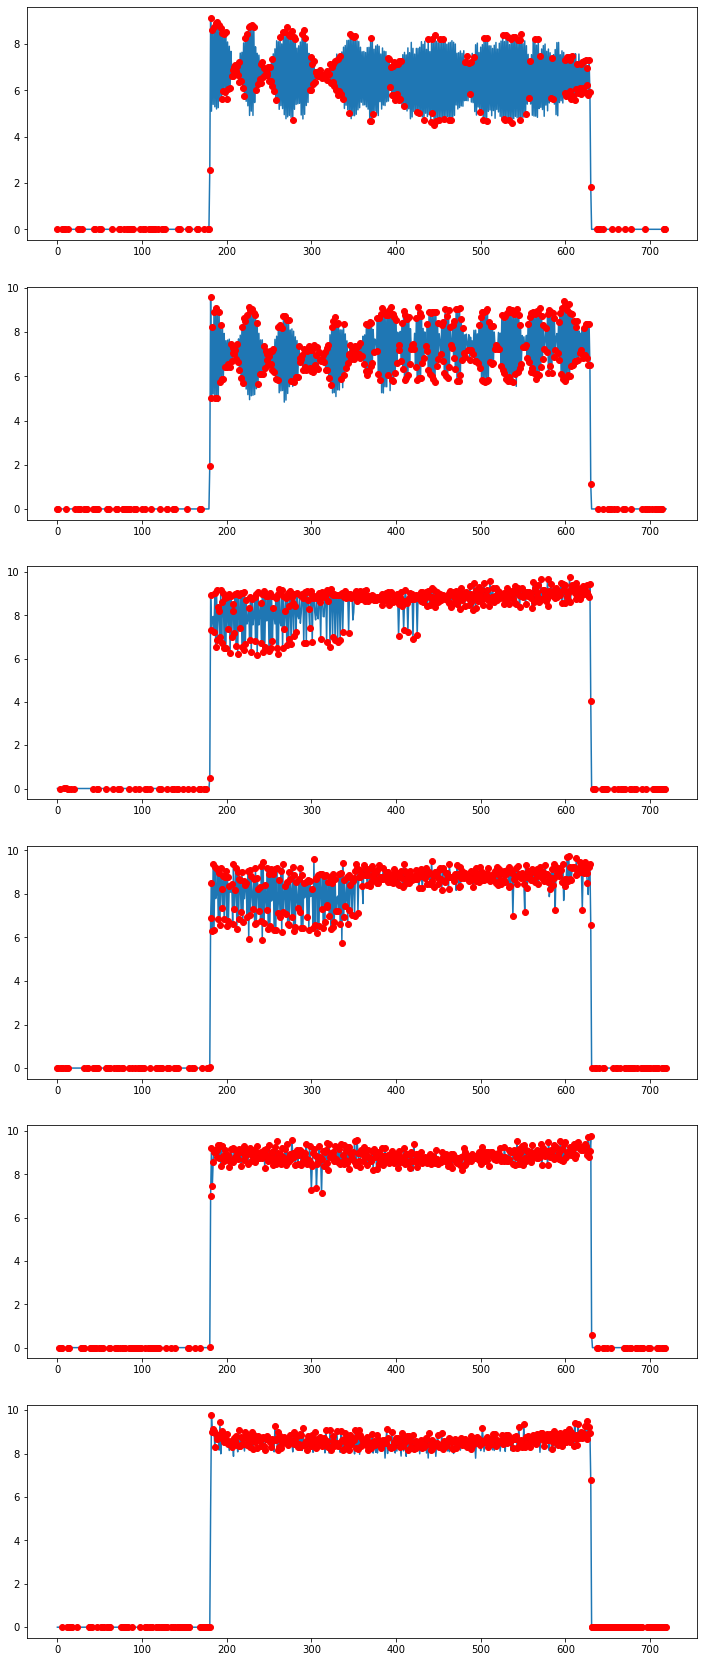

In [74]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

**LOF**\
Original data\
Multi dimension\
Without EMD



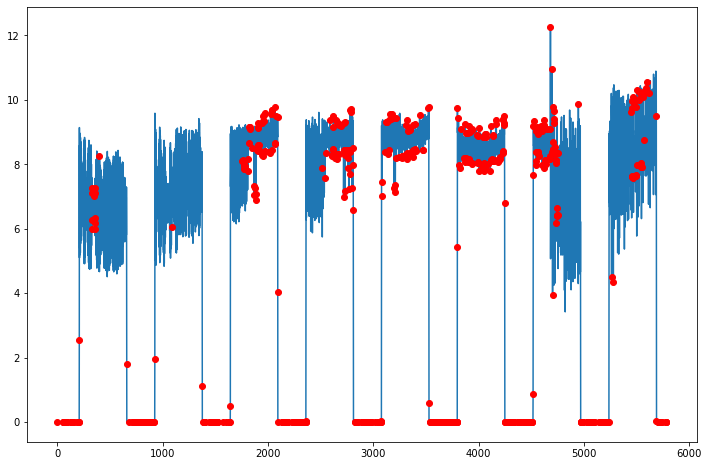

In [75]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=12) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**LOF**\
Windows data\
Multi dimension\
Without EMD



(7, 720, 5)


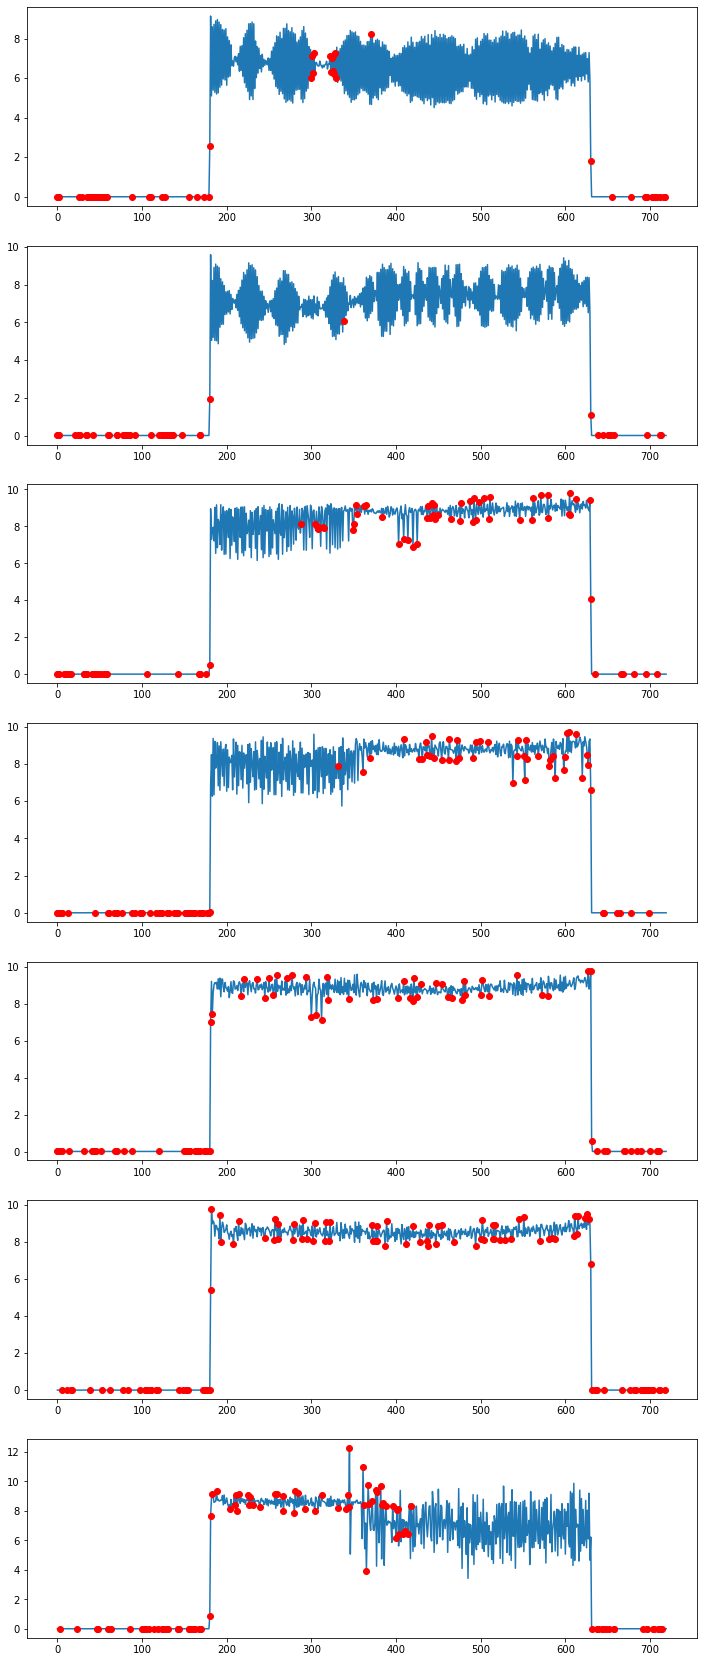

In [77]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after + 720].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=12) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0], zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red', zorder=1)
    i += 1

# ANOM 5

In [46]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019
before = 3
after = 4

**OCSVM**\
Original data\
Multi dimension\
Without EMD\
TRAIN NORM


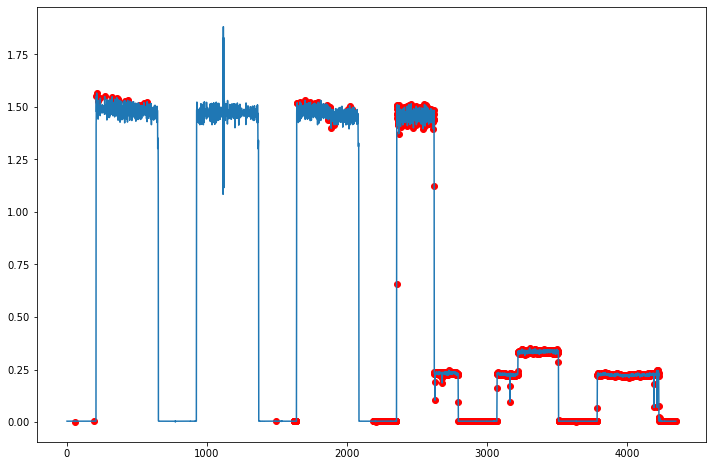

In [52]:
df = get_data(anom.loc[164019 - 730 * 3:164019 ].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019- 730 * 3:164019 + 720 * 3].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

**OCSVM**\
Original data\
Multi dimension\
With EMD\
TRAIN NORM


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


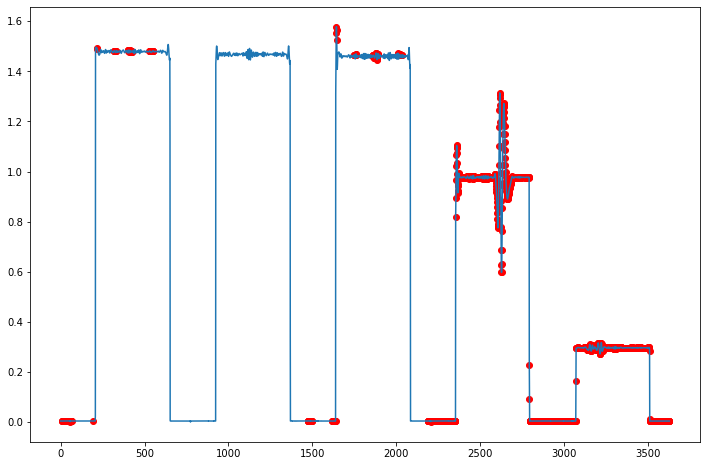

In [55]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

**IF**\
Windows data\
One dimension\
Without EMD\
TRAIN NORM

(2, 720)


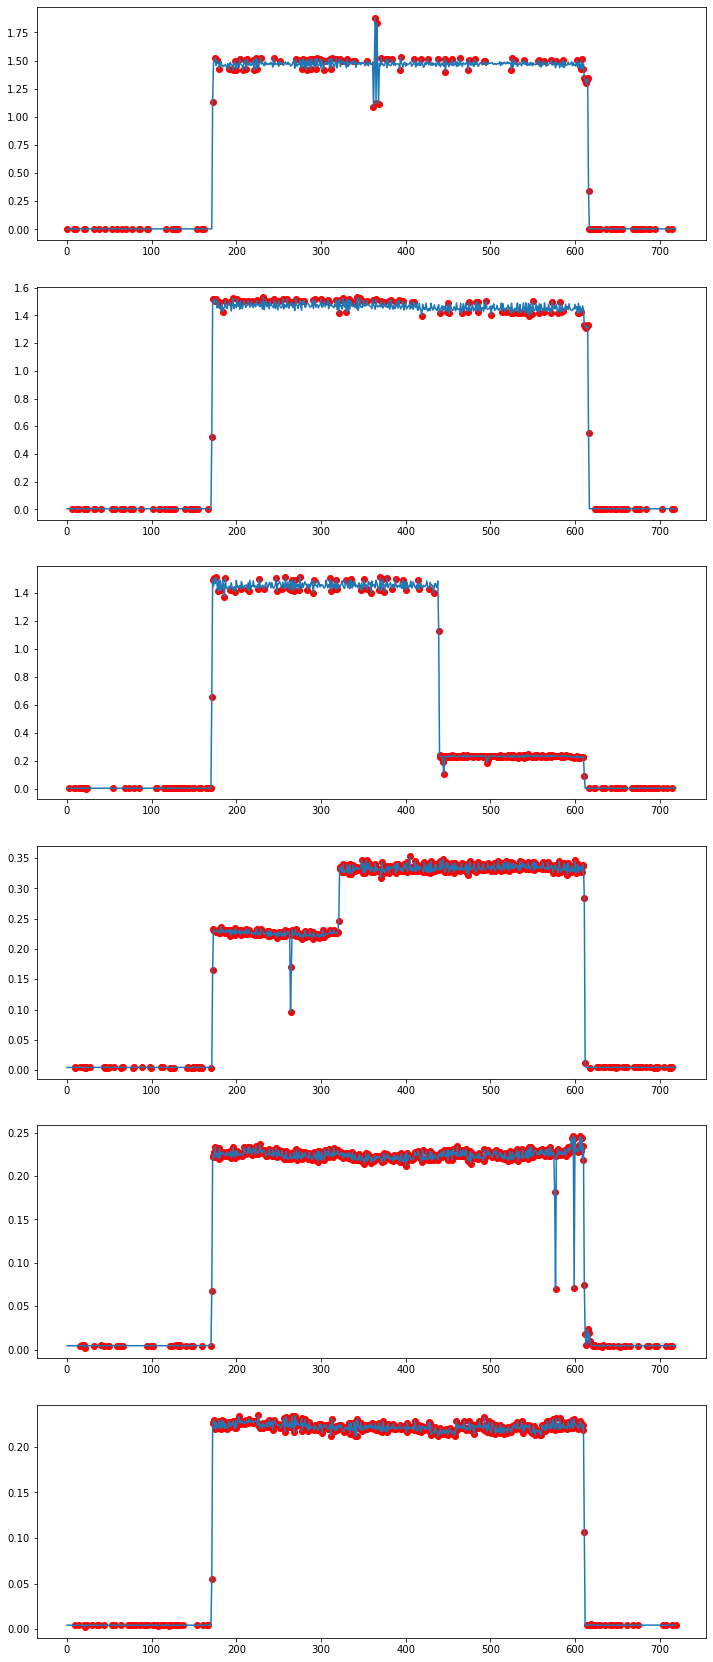

In [59]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

**LOF (n = 5)**\
Original data\
One dimension\
Without EMD

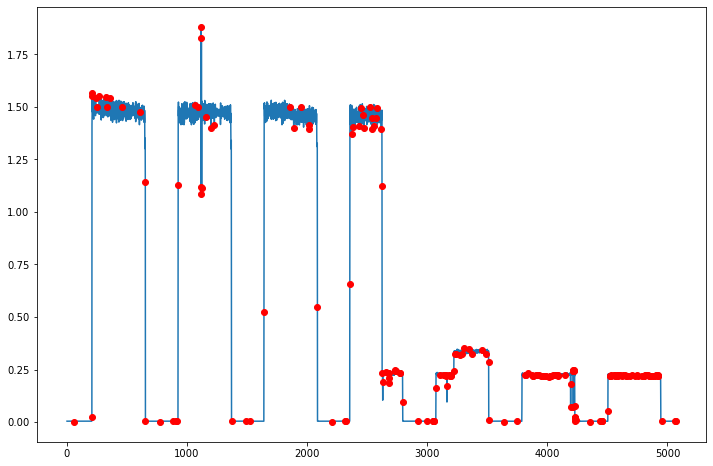

In [64]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=10) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

# ANOM 6

In [65]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 390482

before = 2
after = 3

**IF**\
original data\
Ine dimension\
With EMD\
TRAIN NORM


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


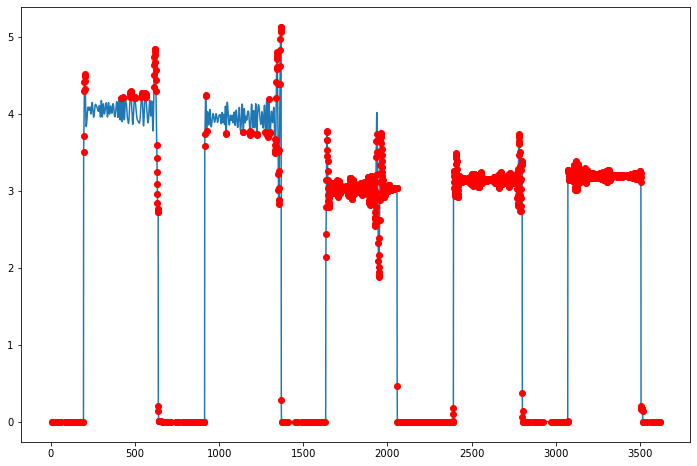

In [68]:
df = get_data(anom.loc[ind - 730 * (before):ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * (before):ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

**LOF (n = 5)**\
Original data\
One dimension\
Without EMD

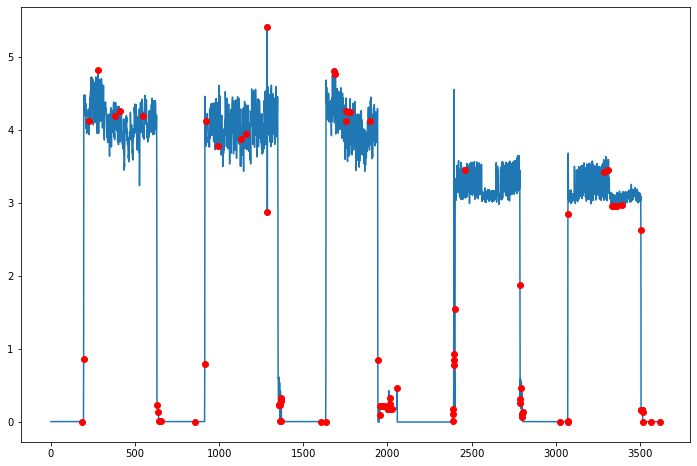

In [66]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=10) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)